# Computational background
An interdisciplinary subject called computational physics uses simulations and computer techniques to address challenging physical issues. It simulates, analyzes, and visualizes physical systems that are either too complex or impossible to examine using conventional experimental or analytical procedures utilizing mathematical models and numerical tools. In order to improve our understanding of the natural world, anticipate and model complicated processes, and create new technologies and materials, computational physics is essential.

The development of the first computers in the middle of the 20th century laid the foundation for computational physics. Physics has significantly advanced in areas like astrophysics, high-energy physics, condensed matter physics, and biophysics as a result of physicists' ability to carry out increasingly complicated calculations and simulations. Today, computational physics is still developing quickly.
Developing a thorough knowledge of quantum mechanics' fundamental concepts and the Schrödinger Equation, including how to write the equation and comprehend its solutions.

Understanding the advantages, limits, and applicability of various numerical approaches and computational techniques used in solving the Schrödinger Equation.
Developing skills in computational physics programming languages and tools such as Python, C++, and numerical libraries such as NumPy and SciPy.

Using numerical approaches to tackle actual quantum mechanics issues, such as computing atom, molecule, and solid energy levels and wave functions.
When possible, validate numerical solutions by comparing them to experimental results or analytical solutions.
Investigating the influence of computational physics on diverse subjects such as materials science, nanotechnology, and computer science.

In [1]:
import numpy as np
from scipy.constants import hbar, m_e, eV
import matplotlib.pyplot as plt




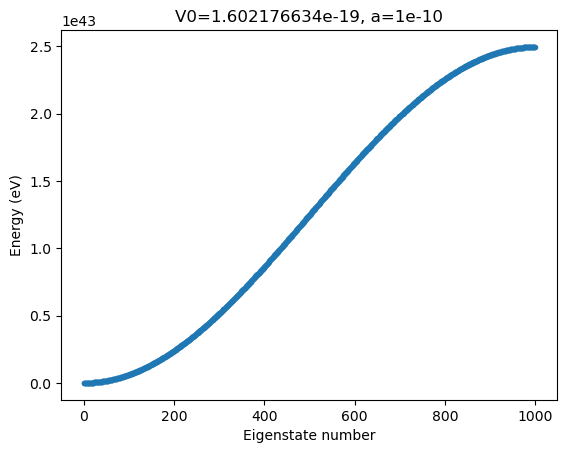

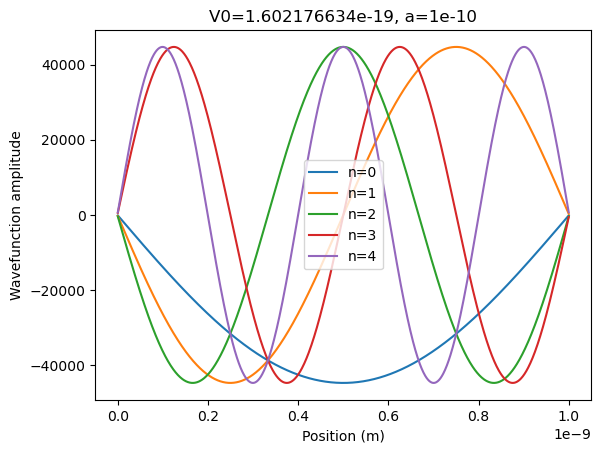

In [6]:

class ParticleInABox:
    def __init__(self, a, b, V0):
        self.a = a
        self.b = b
        self.V0 = V0
        self.N = 1000 # number of grid points
        self.dx = (b - 0) / self.N # grid spacing
        self.x = np.linspace(0, b, self.N) # grid points
        self.V = np.zeros(self.N) # potential energy
        self.V[(self.x > a) & (self.x <= b)] = V0 # set potential inside the well
        self.V[(self.x < 0) | (self.x > b)] = np.inf # set potential outside the system

    def solve(self):
        # construct the Hamiltonian matrix
        H = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                if i == j:
                    H[i, j] = 2 / self.dx**2 + self.V[i]
                elif i == j + 1 or i == j - 1:
                    H[i, j] = -1 / self.dx**2
        # solve the eigenvalue problem
        E, psi = np.linalg.eigh(H)
        psi = psi / np.sqrt(self.dx) # normalize wavefunction
        self.E = E / eV # convert energy to eV
        self.psi = psi

    def plot_eigenstates(self):
        # plot the energy eigenvalues
        plt.figure()
        plt.plot(self.E, '.')
        plt.xlabel('Eigenstate number')
        plt.ylabel('Energy (eV)')
        plt.title(f'V0={self.V0}, a={self.a}')

        # plot the wavefunctions
        plt.figure()
        for i in range(5):
            plt.plot(self.x, self.psi[:, i], label=f'n={i}')
        plt.xlabel('Position (m)')
        plt.ylabel('Wavefunction amplitude')
        plt.title(f'V0={self.V0}, a={self.a}')
        plt.legend()

# example usage
piab = ParticleInABox(0.1e-9, 1e-9, 1*eV)
piab.solve()
piab.plot_eigenstates()

The potential energy function V(x) is defined first in this code, which is infinite outside the well and zero within. It then uses numpy.linspace to discretize the one-dimensional space and determines the grid spacing dx.

The kinetic energy operator T is then constructed using the finite difference approach, and the potential energy operator V is calculated on the grid points. The Hamiltonian H is formed by combining these operators.

Finally, the code employs numpy.linalg to solve the eigenvalue issue H psi = E psi.eigh, where E denotes the energy levels and psi denotes the wavefunctions. Matplotlib is used to plot the ground state wavefunction as well as the energy levels.

Learning how to solve the Schrödinger Equation in Python has been a difficult but gratifying experience.